# **write a VAE:**

4.  where both sides - encoder and decoder - are replaced with encoder-decoder architecture

In [1]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)

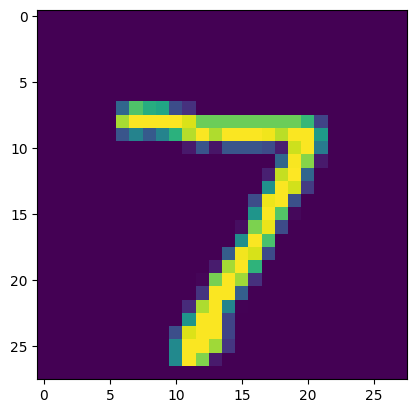

In [3]:
plt.imshow(X_test[0])

In [4]:
#converting into vector
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
X_train.shape

(60000, 784)

In [5]:
#rescale
X_train = X_train/255
X_test = X_test/255
X_train.max()

1.0

model

In [6]:
# Input Layer
input_layer = Input(shape=(X_train.shape[1],), name="input_layer")

# Encoder:
# Encoder (First Part)
encoder1 = Dense(64, activation="relu", name="encoder1")(input_layer)
bottleneck1 = Dense(32, activation="relu", name="bottleneck1")(encoder1)
# Decoder (First Part)
decoder1 = Dense(64, activation="relu", name="decoder1")(bottleneck1)

#main Bottleneck
bottleneck_main = Dense(32, activation="relu", name="bottleneck_main")(decoder1)

# Decoder:
# Encoder (Second Part)
encoder2 = Dense(16, activation="relu", name="encoder2")(bottleneck_main)
bottleneck2 = Dense(8, activation="relu", name="bottleneck2")(encoder2)
# Final Decoder
final_decoder1 = Dense(16, activation="relu", name="final_decoder1")(bottleneck2)
final_decoder2 = Dense(32, activation="relu", name="final_decoder2")(final_decoder1)
final_decoder3 = Dense(64, activation="relu", name="final_decoder3")(final_decoder2)
final_output = Dense(X_train.shape[1], activation="sigmoid", name="final_output")(final_decoder3)

In [7]:
autoencoder = Model(input_layer, final_output)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder1 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck1 (Dense)                  │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder1 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck_main (Dense)              │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder2 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck2 (Dense)                  │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ final_decoder1 (Dense)               │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ final_decoder2 (Dense)               │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ final_decoder3 (Dense)               │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ final_output (Dense)                 │ (None, 784)                 │          50,960 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,936 (433.34 KB)

 Trainable params: 110,936 (433.34 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
encoder= Model(input_layer, bottleneck_main)
encoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder1 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck1 (Dense)                  │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder1 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck_main (Dense)              │ (None, 32)                  │           2,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,512 (220.75 KB)

 Trainable params: 56,512 (220.75 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Input shape matches bottleneck1's output
modified_decoder_input = Input(shape=(32,), name='modified_decoder_input')

# Create decoder model, pass the modified_decoder_input as input to the first layer
x = autoencoder.get_layer('encoder2')(modified_decoder_input)
print(f"encoder2: shape={x.shape}, type={type(x)}")  # Print to check
x = autoencoder.get_layer('bottleneck2')(x)
print(f"bottleneck2: shape={x.shape}, type={type(x)}")
x = autoencoder.get_layer('final_decoder1')(x)
print(f"final_decoder1: shape={x.shape}, type={type(x)}")
x = autoencoder.get_layer('final_decoder2')(x)
print(f"final_decoder2: shape={x.shape}, type={type(x)}")
x = autoencoder.get_layer('final_decoder3')(x)
print(f"final_decoder3: shape={x.shape}, type={type(x)}")
decoder_output = autoencoder.get_layer('final_output')(x)
print(f"decoder_output: shape={decoder_output.shape}, type={type(decoder_output)}")


decoder = Model(modified_decoder_input, decoder_output)
decoder.summary()

encoder2: shape=(None, 16), type=<class 'keras.src.backend.common.keras_tensor.KerasTensor'>
bottleneck2: shape=(None, 8), type=<class 'keras.src.backend.common.keras_tensor.KerasTensor'>
final_decoder1: shape=(None, 16), type=<class 'keras.src.backend.common.keras_tensor.KerasTensor'>
final_decoder2: shape=(None, 32), type=<class 'keras.src.backend.common.keras_tensor.KerasTensor'>
final_decoder3: shape=(None, 64), type=<class 'keras.src.backend.common.keras_tensor.KerasTensor'>
decoder_output: shape=(None, 784), type=<class 'keras.src.backend.common.keras_tensor.KerasTensor'>


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ modified_decoder_input (InputLayer)  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder2 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck2 (Dense)                  │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ final_decoder1 (Dense)               │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ final_decoder2 (Dense)               │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ final_decoder3 (Dense)               │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ final_output (Dense)                 │ (None, 784)                 │          50,960 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,424 (212.59 KB)

 Trainable params: 54,424 (212.59 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
autoencoder.compile(loss='mse', optimizer='adam')
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0932
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0484
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0380
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0347
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0335
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0324
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0317
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0310
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0298
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0290
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0284
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0281
Epoch 13/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0279
Epoch 14/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0275
Epoch 15/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - l

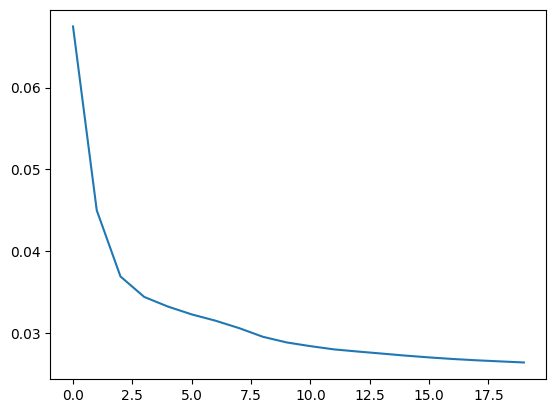

In [11]:
plt.plot(history.history['loss'])

In [12]:
encoded_data = encoder.predict(X_test, batch_size=512)
encoded_data.shape

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


(10000, 32)

In [13]:
output_data=decoder.predict(encoded_data, batch_size=512)
output_data.shape

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


(10000, 784)

In [14]:
reshaped_output_data = output_data.reshape(output_data.shape[0], 28, 28)
reshaped_output_data.shape

(10000, 28, 28)

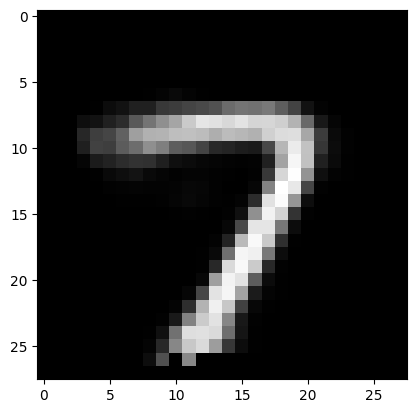

In [15]:
plt.imshow(reshaped_output_data[0], cmap='gray')

In [16]:
X_test=X_test.reshape(10000, 28, 28)
X_test.shape

(10000, 28, 28)

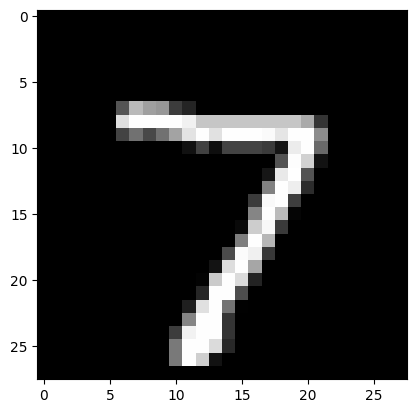

In [17]:
plt.imshow(X_test[0], cmap='gray')

In [18]:
from sklearn.metrics import mean_squared_error

# Reshape X_test to match output_data's shape
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Calculate MSE
mse = mean_squared_error(X_test_flat, output_data)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.026452232309875465


# Conclusion
For an architecture the decoder is replaced with an encoder-decoder architecture, the mean-square error is 0.026.